In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
indexes = pd.read_excel("/Users/khetag/Downloads/data_akbilgic.xlsx")

/Users/khetag/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [96]:
indexes

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.035754,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
...,...,...,...,...,...,...,...,...,...,...
532,2011-02-16 00:00:00,0.008599,0.0134,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
533,2011-02-17 00:00:00,0.00931,0.015977,0.003071,-0.001186,0.000345,0.00262,0.001686,-0.000581,0.001039
534,2011-02-18 00:00:00,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
535,2011-02-21 00:00:00,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [97]:
indexes.drop('TL BASED', axis=1, inplace=True)

Все индексы выражены в долларах, поэтому удалим столбец ISE в лирах из датафрейма, он при анализе, в целом, не понадобится.

In [98]:
names = list(indexes.iloc[0]) #в первой строке датафрейма находятся названия столбцов, сохраним их в отдельный список и в следующей строке удалим их из датафрейма
indexes.drop(0, inplace = True)
indexes.columns = names #присваиваем эти названия столбцам датафрейма

In [99]:
indexes

,date,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.038376,-0.004679,0.002193,0.003894,0,0.03119,0.012698,0.028524
2,2009-01-06 00:00:00,0.031813,0.007787,0.008455,0.012866,0.004162,0.01892,0.011341,0.008773
3,2009-01-07 00:00:00,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
4,2009-01-08 00:00:00,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
5,2009-01-09 00:00:00,0.009658,-0.021533,-0.019873,-0.01271,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
532,2011-02-16 00:00:00,0.0134,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
533,2011-02-17 00:00:00,0.015977,0.003071,-0.001186,0.000345,0.00262,0.001686,-0.000581,0.001039
534,2011-02-18 00:00:00,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
535,2011-02-21 00:00:00,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [100]:
dates = indexes.date
indexes.drop('date',axis=1, inplace=True)
indexes = indexes.astype(float) #конвертируем все значения в float, предварительно убрав из датафрейма столбец с datetime значениями
indexes['dates'] = dates #возвращаем даты в обновленный датафрейм

In [101]:
#посчитаем корреляцию
corr = indexes.drop('dates', axis=1).dropna().corr()
corr

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


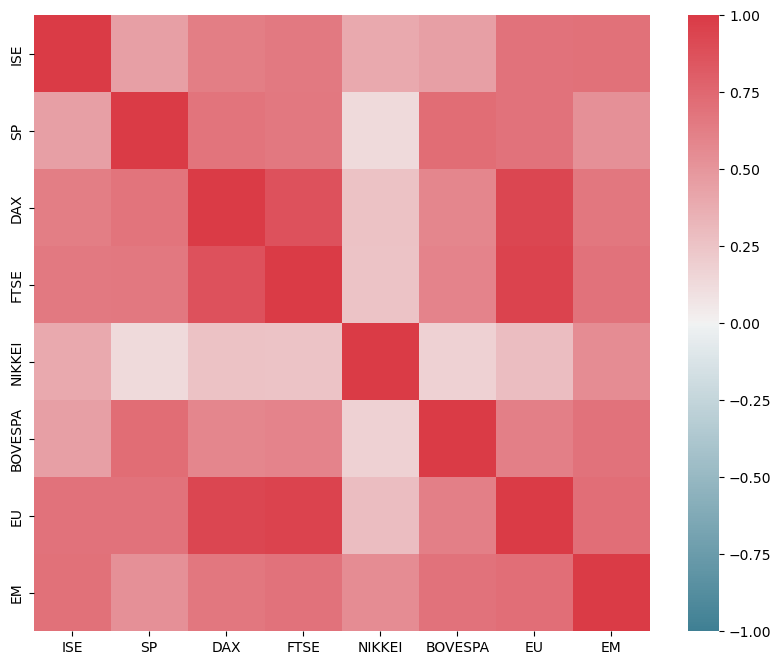

In [102]:
#выведем тепловую карту, чтобы было более наглядно видно корреляцию значений

from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

plt.show()

Заметим, что сильнее всего коррелируют EU и DAX, EU и FTSE, DAX и FTSE. Это, в целом, логично, так как все они — европейские индексы.

Посчитаем общее изменение индексов за эти два года.

In [103]:
for column in range(len(list(indexes.columns)) - 1):
    column_name = indexes.columns[column] + ' change'
    indexes[column_name] = indexes[indexes.columns[column]].sum() #тут просто добавляем новые столбцы, в которых записано суммарное изменение индекса за этот период времени

indexes_change = indexes[['ISE change', 'SP change', 'DAX change', 'FTSE change', 'NIKKEI change', 'BOVESPA change', 'EU change', 'EM change']].drop_duplicates()
indexes.drop(['ISE change', 'SP change', 'DAX change', 'FTSE change', 'NIKKEI change', 'BOVESPA change', 'EU change', 'EM change'], axis=1, inplace=True) #удаляем лишнее из изначального датафрейма

In [104]:
indexes_change

,ISE change,SP change,DAX change,FTSE change,NIKKEI change,BOVESPA change,EU change,EM change
1,0.831993,0.344808,0.386348,0.273509,0.164935,0.501338,0.252231,0.501661
